In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 # imp for image recognigtion task
from google.colab.patches import cv2_imshow # to display an image
from PIL import Image # another image processing lib
import tensorflow as tf
tf.random.set_seed(3) # purpose of this, to get consistent result
from tensorflow import keras
!pip install keras
from keras.datasets import mnist # already has some datasets
from tensorflow.math import confusion_matrix

In [2]:
# loading the MNIST digits classification dataset
# the images are converted to numpy array for us from before here
# the shape of training data is (60000, 28, 28) here there aer 60k images with a dimension of 28x28
# these are grayscale images, mean they have 1 color channel so we dont have to make any changes
# remember the Y_train has the label aka the output

(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


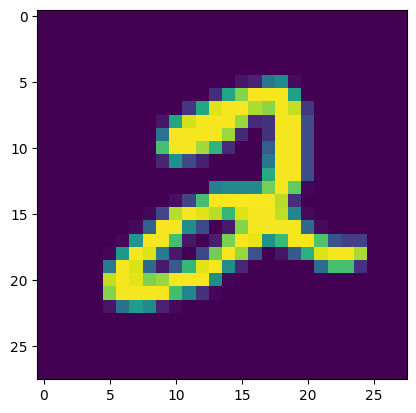

2


In [3]:
# we can also convert the numpy array to image

plt.imshow(X_train[5])
plt.show()

# taking 5th image's corresponding label(the output)
print(Y_train[5])


In [4]:
# unique values in y_train and y_test

print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [5]:
# scaling the values, doesnt loose the value just adjusts it

X_train = X_train/255
X_test = X_test/255

# simplest way to turn values that range from 0 to 255 into 0.0 to 1.0

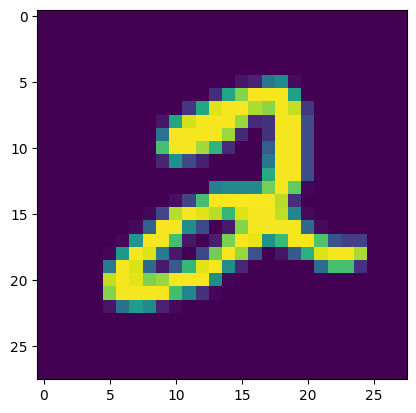

In [6]:
plt.imshow(X_train[5])
plt.show()

# as u can see its still the same

In [7]:
# building the NN

# setting up the layers of the NN
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # we cannot feed the data in the form of matrix, so we make it a single dimensional array
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'), # here 10 means the number of classes we have
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# have to mention here optimizers, loss function , metrics

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])



In [9]:
# training the NN

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8520 - loss: 0.5199
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9559 - loss: 0.1518
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9672 - loss: 0.1086
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9756 - loss: 0.0843
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9796 - loss: 0.0679
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9834 - loss: 0.0556
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9869 - loss: 0.0458
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9889 - loss: 0.0387
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9900 - loss: 0.0338
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9906 - loss: 0.0308


In [10]:
# model evaluation

loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)
print(loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9656 - loss: 0.1287
0.9675999879837036
0.12529218196868896


Test data accuracy is 93% and training accuracy is 93%

In [11]:
# interesting factor here, remember how we have set the output layer to have 10 neruons
# with an activation func of sigmoid. Here the Y_pred will have all the output nerons for 10 digits
# that is , there is 10,000 records of an array of size 10, each value in the array
# is the probability of the "Digit" the NN has predicted and for every index, highest
# value at that index means that NN has predicted that index value is the handwritten image.

Y_pred = model.predict(X_test)

print(Y_pred)

print(Y_pred[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[4.2714051e-05 1.0599626e-03 2.5796385e-02 ... 9.9998307e-01
  6.0226656e-02 9.9069017e-01]
 [3.6606751e-05 9.9959427e-01 1.0000000e+00 ... 1.9436429e-06
  3.2075694e-01 5.9836784e-12]
 [7.8209704e-03 9.9995482e-01 8.5183614e-01 ... 4.9080718e-01
  8.1637865e-01 1.1606734e-04]
 ...
 [2.9224130e-09 3.5592555e-05 2.2157954e-07 ... 1.8315694e-01
  9.6829282e-03 9.7024739e-01]
 [4.1625026e-05 4.5984551e-05 1.9868632e-05 ... 2.3372932e-03
  9.9375618e-01 6.7166893e-06]
 [1.1591938e-02 1.0938642e-06 2.7382555e-06 ... 4.6326755e-11
  3.2513519e-05 1.1348540e-04]]
[4.2714051e-05 1.0599626e-03 2.5796385e-02 9.9758762e-01 1.0851287e-09
 4.5372039e-02 2.4843893e-11 9.9998307e-01 6.0226656e-02 9.9069017e-01]


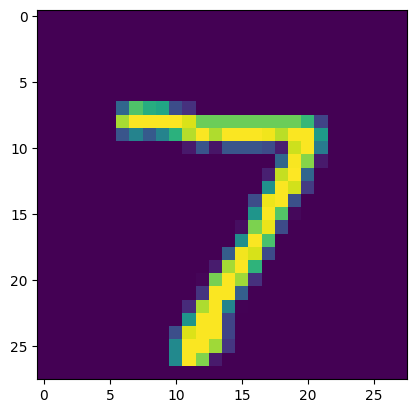

In [12]:
# as you can see below the image at test of 0 index is 7 and
# the predicted output of 0 index is an array where the
# subarray of index 7 has the highest probability. so it predicted 7

plt.imshow(X_test[0])

In [13]:
# converting the prediction probability from the sub-array to class label
# basically loop through all 10,000 test data and pick the highest probability from sub-array
# that is our output/label

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 3, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [14]:
# A confusion matrix represents the prediction summary in matrix form.
# It shows how many prediction are correct and
# incorrect per class. It helps in understanding the classes that
# are being confused by model as other class.

confusion_mat = confusion_matrix(Y_test, Y_pred_labels)
print(confusion_mat)

tf.Tensor(
[[ 963    0    4    3    3    0    1    0    2    4]
 [   0 1112    2    5    1    0    2    3   10    0]
 [   3    6  978   19    3    1    1    7   14    0]
 [   0    0    2  972    1   20    0    7    1    7]
 [   0    0    4    0  969    0    0    4    2    3]
 [   3    1    0    6    2  867    5    0    3    5]
 [   4    3    1    1   11    6  930    0    1    1]
 [   2    0    8    4    4    0    0  987    2   21]
 [   2    0    7    9    7   10    7    3  917   12]
 [   4    1    0    4   11    5    0    4    2  978]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

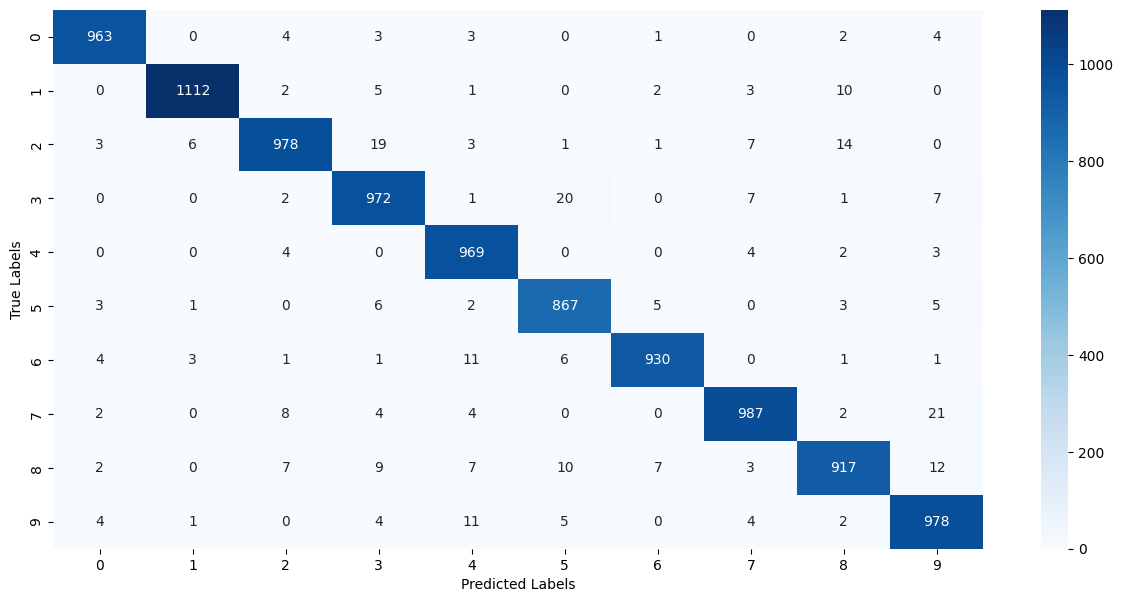

In [15]:
plt.figure(figsize=(15,7))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [16]:
# we studied this in data mining I think

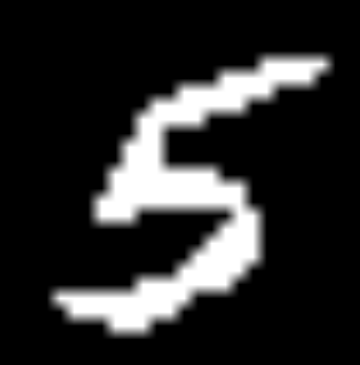

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The prediction classification  [1.4751992e-17 6.6667999e-05 7.2297835e-18 9.9939805e-01 2.0545670e-13
 1.0000000e+00 6.3214737e-01 3.4276445e-14 8.1113416e-01 9.6495338e-03]
The Handwritten Digit is recognised as  5


In [69]:
input_image_path = "/content/mnist-five_two_digit.png"

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

print("The prediction classification ", input_prediction[0])

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)